In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten


import os
os.chdir('/content/drive/My Drive/DogvsCat')
os.listdir()

['test', 'train']

In [ ]:
train_dir = '/content/drive/My Drive/DogvsCat/train'
test_dir = '/content/drive/My Drive/DogvsCat/test'

In [ ]:
from keras.utils import image_dataset_from_directory
train_generator = image_dataset_from_directory(train_dir, image_size=(224, 224), batch_size=32)
test_generator = image_dataset_from_directory(test_dir, image_size=(224, 224), batch_size=32)

Found 368 files belonging to 2 classes.
Found 103 files belonging to 2 classes.


In [ ]:
from keras.applications.vgg16 import VGG16
vgg = VGG16()
vgg.summary()

553467096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
from keras import Sequential
model = Sequential()
for layer in vgg.layers[:-1]:
    model.add(layer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
from keras.layers import Dense
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
logs = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
12/12 [==============================] - 326s 26s/step - loss: 0.4556 - accuracy: 0.7989 - val_loss: 0.3360 - val_accuracy: 0.8641
Epoch 2/10
12/12 [==============================] - 296s 25s/step - loss: 0.1237 - accuracy: 0.9375 - val_loss: 0.2984 - val_accuracy: 0.8544
Epoch 3/10
12/12 [==============================] - 322s 27s/step - loss: 0.0709 - accuracy: 0.9647 - val_loss: 0.2646 - val_accuracy: 0.8932
Epoch 4/10
12/12 [==============================] - 310s 26s/step - loss: 0.0450 - accuracy: 0.9864 - val_loss: 0.2858 - val_accuracy: 0.8932
Epoch 5/10
12/12 [==============================] - 317s 27s/step - loss: 0.0290 - accuracy: 0.9973 - val_loss: 0.2611 - val_accuracy: 0.8835
Epoch 6/10
12/12 [==============================] - 295s 25s/step - loss: 0.0229 - accuracy: 1.0000 - val_loss: 0.2593 - val_accuracy: 0.8738
Epoch 7/10
12/12 [==============================] - 298s 25s/step - loss: 0.0189 - accuracy: 1.0000 - val_loss: 0.2575 - val_accuracy: 0.8738
Epoch 

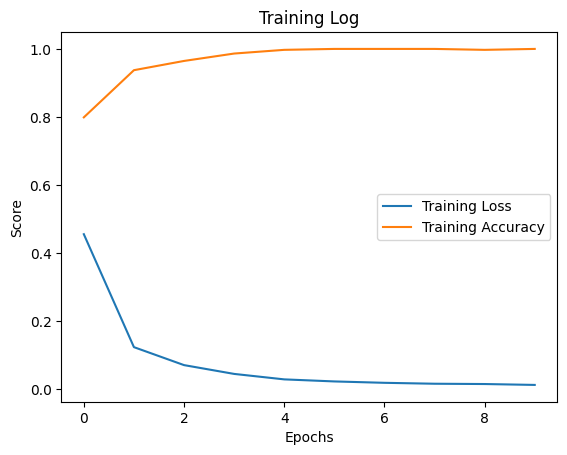

In [ ]:
import matplotlib.pyplot as plt
plt.title('Training Log')
plt.plot(logs.history['loss'], label='Training Loss')
plt.plot(logs.history['accuracy'], label='Training Accuracy')
#plt.plot(logs.history['val_loss'], label='Validation Loss', linewidth=3)
#plt.plot(logs.history['val_accuracy'], label='Validation accuracy', linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.show()

In [ ]:
res = model.evaluate(test_generator)

4/4 [==============================] - 76s 16s/step - loss: 0.2787 - accuracy: 0.8738


In [ ]:
accuracy = res[1]
print(accuracy)

0.8737863898277283
